# Pandas Lahman Baseball

See: https://www.kaggle.com/seanlahman/the-history-of-baseball/notebooks?sortBy=hotness&group=everyone&pageSize=20&datasetId=26&language=Python

In [1]:
# See: https://www.kaggle.com/gracezhou0912/baseball-analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly

In [2]:
player_csv   = "https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/People.csv"
salary_csv   = "https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Salaries.csv"
team_csv     = "https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Teams.csv"
fielding_csv = "https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Fielding.csv"

player   = pd.read_csv(player_csv)
salary   = pd.read_csv(salary_csv)
team     = pd.read_csv(team_csv)
fielding = pd.read_csv(fielding_csv)

print(player.columns)
print(salary.columns)
print(team.columns)
print(fielding.columns)

Index(['playerID', 'birthYear', 'birthMonth', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear', 'deathMonth', 'deathDay',
       'deathCountry', 'deathState', 'deathCity', 'nameFirst', 'nameLast',
       'nameGiven', 'weight', 'height', 'bats', 'throws', 'debut', 'finalGame',
       'retroID', 'bbrefID'],
      dtype='object')
Index(['yearID', 'teamID', 'lgID', 'playerID', 'salary'], dtype='object')
Index(['yearID', 'lgID', 'teamID', 'franchID', 'divID', 'Rank', 'G', 'Ghome',
       'W', 'L', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H', '2B',
       '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER', 'ERA',
       'CG', 'SHO', 'SV', 'IPouts', 'HA', 'HRA', 'BBA', 'SOA', 'E', 'DP', 'FP',
       'name', 'park', 'attendance', 'BPF', 'PPF', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro'],
      dtype='object')
Index(['playerID', 'yearID', 'stint', 'teamID', 'lgID', 'POS', 'G', 'GS',
       'InnOuts', 'PO', 'A', 'E', 'DP', 'PB', 'WP', 'SB', 'CS',

Text(0.5, 1.0, 'Baseball player salary over years')

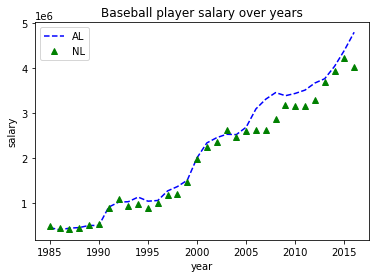

In [4]:
# first, we focus on some general analysis salary between leagues and year
import warnings

warnings.filterwarnings('ignore')
data = salary.groupby(["yearID","lgID"]).mean().unstack().copy(deep = True)
# see the salary trend
plt.plot(data["salary"]["AL"], 'b--', data["salary"]["NL"], 'g^')
plt.xlabel("year")
plt.ylabel("salary")
plt.legend(["AL","NL"], loc = "upper left")
plt.title("Baseball player salary over years")

***
Index(['1B', '2B', '3B', 'C', 'OF', 'P', 'SS'], dtype='object', name='POS')
***


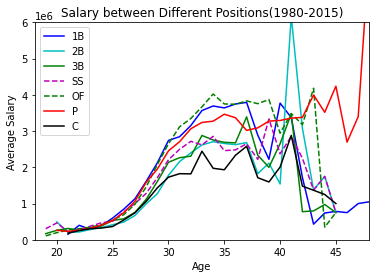

In [5]:
warnings.filterwarnings('ignore')
player_position = pd.merge(salary, fielding, on = ["playerID","yearID"])[["yearID", "playerID", "salary", "POS"]]
player_position = pd.merge(player_position, player, on = ["playerID"], how = "left")[["yearID", "playerID","salary", "POS", "birthYear"]]
player_position["age"] = player_position["yearID"] - player_position["birthYear"] 
player_position = player_position[player_position.yearID >= 1980]
data = player_position.groupby(["age", "POS"]).mean()["salary"].unstack()

print("***")
print(data.columns)
print("***")

plt.plot(data["1B"], 'b-', data["2B"], 'c-', data["3B"], 'g-', data["SS"], 'm--', data['OF'], 'g--', data['P'],'r-', data['C'],'k-')
_ = plt.xlabel("Age")
_ = plt.ylabel("Average Salary")
_ = plt.legend(["1B",'2B','3B','SS',"OF","P","C"], loc = 'upper left')
_ = plt.title("Salary between Different Positions(1980-2015)")
_ = plt.xlim([18,48])
_ = plt.ylim([0,6000000])

    playerID  weight  height bats throws       debut   finalGame   retroID  \
0  aardsda01   215.0    75.0    R      R  2004-04-06  2015-08-23  aardd001   
1  aardsda01   215.0    75.0    R      R  2004-04-06  2015-08-23  aardd001   
2  aardsda01   215.0    75.0    R      R  2004-04-06  2015-08-23  aardd001   
3  aardsda01   215.0    75.0    R      R  2004-04-06  2015-08-23  aardd001   
4  aardsda01   215.0    75.0    R      R  2004-04-06  2015-08-23  aardd001   

     bbrefID nameFirst  ...  RBI   SB   CS  BB   SO  IBB  HBP   SH   SF  GIDP  
0  aardsda01     David  ...  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0  
1  aardsda01     David  ...  0.0  0.0  0.0   0  0.0  0.0  0.0  1.0  0.0   0.0  
2  aardsda01     David  ...  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0  
3  aardsda01     David  ...  0.0  0.0  0.0   0  1.0  0.0  0.0  0.0  0.0   0.0  
4  aardsda01     David  ...  0.0  0.0  0.0   0  0.0  0.0  0.0  0.0  0.0   0.0  

[5 rows x 35 columns]


Which active player had th

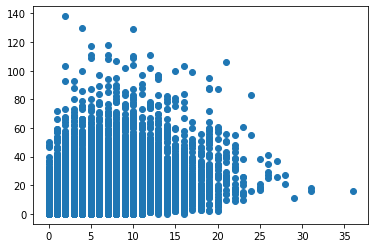

texas        265
usc          250
stanford     248
arizonast    236
michigan     191
Name: schoolID, dtype: int64


,W,WP,L,playerID
playerID,,,,
kershcl,13,10.0,12,kershcl
clemero,12,10.0,8,clemero
lackejo,8,10.0,6,lackejo
ankieri,0,9.0,0,ankieri
verlaju,14,8.0,11,verlaju
...,...,...,...,...
hudsoch,1,0.0,2,hudsoch
hraboal,0,0.0,0,hraboal
hoytwa,6,0.0,4,hoytwa


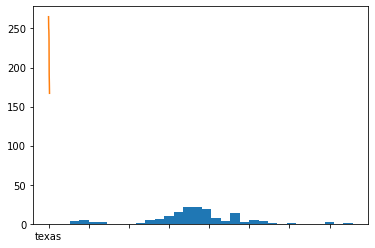

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from datetime import date

people = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/People.csv")
batting = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Batting.csv")
collegeplaying = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/CollegePlaying.csv")
teams = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/Teams.csv")
pitching = pd.read_csv("https://raw.githubusercontent.com/chadwickbureau/baseballdatabank/master/core/PitchingPost.csv")

# Merge people and batting tables on playerID
p_people = people[["playerID", "weight", "height", "bats",
                   "throws", "debut", "finalGame", "retroID", "bbrefID", "nameFirst", "nameLast", "birthYear", "birthMonth", "birthDay"]]
p_b = p_people.merge(batting, on="playerID")
print(p_b.head(5))

# filteroutdates
start_date = "2019-01-01"
end_date = "2020-08-18"

after_start_date = p_b["finalGame"] >= start_date
before_end_date = p_b["finalGame"] <= end_date
between_two_dates = after_start_date & before_end_date
p_bfinal = p_b.loc[between_two_dates]

# filterplayers with less than 50 games
activeplayers = p_bfinal[p_bfinal["G"] > 49]

activeplayers["fullname"] = activeplayers["nameFirst"].str.cat(activeplayers["nameLast"], sep=" ")

columns = ["nameFirst", "nameLast"]

activeplayers.drop(columns, axis=1, inplace=True)

# Which active player had the most runs batted in (“RBI” from the Batting table) from 2015-2018?
activeplayers.sort_values(by=['RBI'], inplace=True, ascending=False)
years = [2015, 2016, 2017, 2018]
RBIyears = activeplayers[activeplayers.yearID.isin(years)]
aggregation_functions = {'RBI': 'sum', 'fullname': 'first'}
RBInew = RBIyears.groupby(
    RBIyears['fullname']).aggregate(aggregation_functions)
RBInew.sort_values(by='RBI', inplace=True, ascending=False)
print("\n\nWhich active player had the most runs batted in (“RBI” from the Batting table) from 2015-2018?")
print(RBInew.head())
print()

# How many double plays did Albert Pujols ground into (“GIDP” from Batting table) in 2016?
GIDPyear = activeplayers[activeplayers["yearID"] == 2016]
GIDPplayer = GIDPyear[GIDPyear["fullname"] == "Albert Pujols"]
print("\n\nHow many double plays did Albert Pujols ground into (“GIDP” from Batting table) in 2016?")
print(GIDPplayer[["fullname", "GIDP"]])
print()

# SCATTERPLOT scatter plot relating triples (3B) and steals (SB)
plt.scatter(batting['3B'], batting["SB"])
plt.show()

# HISTOGRAM A histogram of triples (3B) per year.
batting_triplets = batting.groupby("yearID")["3B"].sum()
batting_triplets.hist(bins=30)

# Which college produced more players?
moreplayers = collegeplaying["schoolID"].value_counts()
print(moreplayers.head())
moreplayers.iloc[0:7].plot()

# Which team has won the World Series with most attendance in the same year?
teams_1 = teams[['name', 'attendance', 'yearID', 'WSWin']]
wsteams = teams_1[teams_1.WSWin != "N"]
wsteams.sort_values(by='attendance', ascending=False)

# Which player won the most games with wild pitchs during post season?
pitching['playerID'] = pitching['playerID'].str[:-2]
pitching.drop(pitching.columns.difference(['playerID', 'W', 'L', 'WP']), 1, inplace=True)
pitching.sort_values(by="WP", ascending=False)
aggregation_functions = {'W': 'sum', 'WP': 'sum', 'L': 'sum', 'playerID': 'first'}
df_new = pitching.groupby(
    pitching['playerID']).aggregate(aggregation_functions)
df_new.sort_values(by='WP', ascending=False)
